<a href="https://colab.research.google.com/github/LalithaRenuka/se1/blob/main/dtcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detected 10 vehicles in image1.jpg


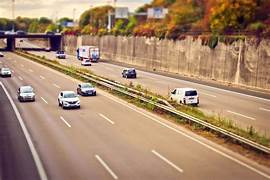

Detected 4 vehicles in image2.jpg


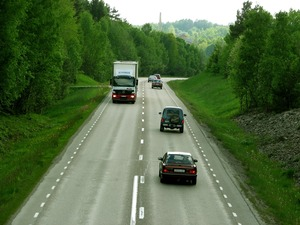

Detected 14 vehicles in image3.jpg


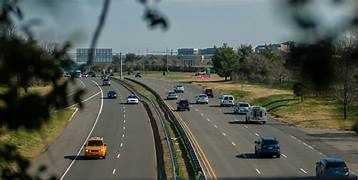

Detected 34 vehicles in image4.jpg


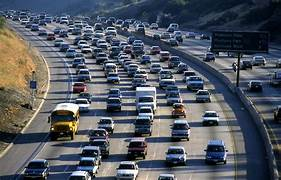

Image with the most vehicles: image4.jpg with 34 vehicles.


In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load YOLO model weights and configuration files
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Load the COCO class labels (80 classes, including vehicles)
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# List of vehicle classes as per the COCO dataset
vehicle_classes = ['car', 'bus', 'truck', 'motorbike', 'bicycle']

def detect_vehicles(image):
    height, width, _ = image.shape

    # Create a blob from the input image
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Initialize lists for detected bounding boxes, confidences, and class IDs
    boxes = []
    confidences = []
    class_ids = []

    # Iterate over each output layer and each detection
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            # Filter based on confidence threshold and vehicle class
            # Lower the threshold to detect more vehicles
            if confidence > 0.3 and classes[class_id] in vehicle_classes:  # Changed from 0.5 to 0.3
                # Object detected, get bounding box coordinates
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Calculate top-left corner of the bounding box
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Append the box, confidence, and class ID (no drawing now)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Max Suppression (NMS) to eliminate overlapping boxes
    # Adjust NMS threshold
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.4)  # Changed from 0.5 to 0.3

    vehicle_count = 0

    if len(indices) > 0:
        for i in indices.flatten():
            label = str(classes[class_ids[i]])

            # Only count vehicles (no drawing of bounding boxes)
            if label in vehicle_classes:
                vehicle_count += 1

    return vehicle_count

# List of image file paths (replace with actual paths)
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg']
vehicle_counts = {}

# Process each image
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not load image: {image_path}")
        continue

    # Detect vehicles in the image (without drawing boxes)
    num_vehicles = detect_vehicles(image)
    vehicle_counts[image_path] = num_vehicles
    print(f"Detected {num_vehicles} vehicles in {image_path}")

    # Optionally show the image without boxes (just for visualization)
    cv2_imshow(image)

# Find the image with the most vehicles
image_with_most_vehicles = max(vehicle_counts, key=vehicle_counts.get)
print(f"Image with the most vehicles: {image_with_most_vehicles} with {vehicle_counts[image_with_most_vehicles]} vehicles.")
